# **1.观察大局**
## 1.1使用Kaggle平台上的威斯康辛州乳腺癌数据集
模型需要从这个数据中学习，对数据集进行分类，并可视化，并最终比较分类结果
## 1.2实现步骤
* 读取数据
* 数据可视化
* 数据分析
* 特征编码
* 特征缩放
    * 数据标准化
        * KNN - 寻找K值
        * 观察最优K值
        * 预测（测试和训练）
    * 数据归一化
        * KNN - 寻找K值
        * 观察最优K值
        * 预测（测试和训练）

# 设置
* 首先引入一些需要的库

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
rcParams['font.family'] = 'SimHei'

# **2.读取数据**
展示前八行数据，然后删除不相关的列（id 和 Unnamed: 32），并输出数据的信息。

In [2]:
data = pd.read_csv("D:\大二\机器学习\data.csv")
print(data.head(8))
# id and Unnamed: 32 does not look relevant information. Dropping it.
data = data.drop(['id', 'Unnamed: 32'],axis=1)
print(data.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740     

# **3.数据可视化** 
可视化数据结果，绘制乳腺癌诊断结果的分布图（检查数据本身是否对特定结果偏差较大，这可能会影响模型的性能）

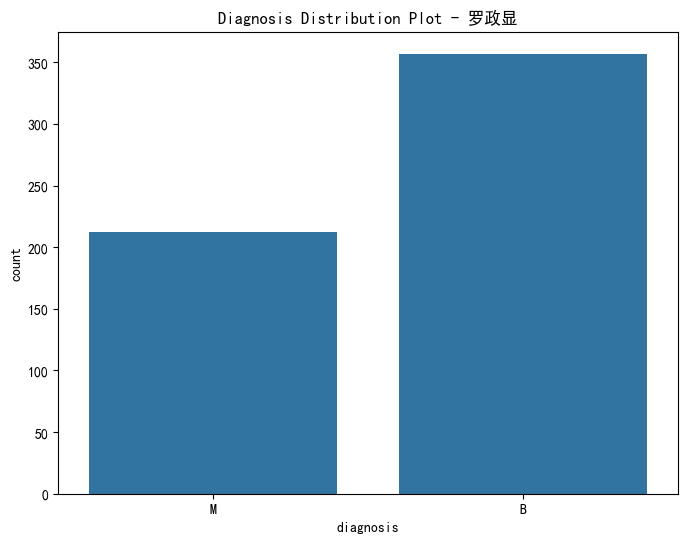

In [3]:
plt.figure(figsize=(8, 6))
sns.countplot(x = data['diagnosis'])
plt.title('Diagnosis Distribution Plot - 罗政显')
plt.show()

# **4.数据分析**
初步了解数据的分布和特征，特别是特征的数值是多少（包括计数、平均值、标准差、最小值、第一、二、三四分位数和最大值等）。这将表明是否需要标准化。

In [4]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# **5.数据预处理**
对数据进行预处理，包括编码标签、拆分数据集中的特征和标签。

In [5]:
# 由于结果标记为“M”和“B”，这对kNN来说没有用。分别将其转换为“1”和“0”。
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])
data['diagnosis'].unique()

array([1, 0])

In [6]:
# 拆分数据集中的特征和标签
Y_data=data['diagnosis']
X_data=data.drop(['diagnosis'],axis=1)
print(type(Y_data))

<class 'pandas.core.series.Series'>


# **6.特征缩放**
需要进行缩放，因为一些特征的分布是不均匀的。例如：smoothness_se的平均值是0.09，而area_mean的平均值是654.8，这表明这两个特征的值处于不同的尺度。为了使模型表现良好，重要的是对数据进行缩放。

## 6.1数据标准化

In [7]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
X_data_std = scaled.fit_transform(X_data)
Y_data = Y_data.to_numpy()
# 数据集划分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_std, Y_data, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


### 6.1.1KNN - 寻找K值
使用标准缩放数据来确定反映最佳性能的K值。由于特征数量较多，预计较小的值应该会导致更好的性能。由于KNN不需要训练，但K值是未知的。因此，KNN在测试数据上执行一系列k值。最佳表现的k值用于评估指标和混淆矩阵。

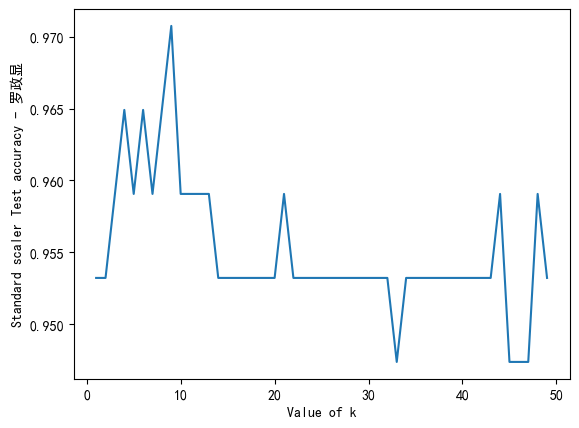

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

scores_list = [] # 用于存储每个k值对应的测试集准确率。
scores = {} # 用于存储每个k值及其对应的准确率（以字典形式）。
k_range = range(1,50) #指定k的取值范围，从1到49。
#循环训练和评估模型
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
# 绘制准确率随k值变化的图形
plt.plot(k_range, scores_list)
plt.xlabel("Value of k")
plt.ylabel("Standard scaler Test accuracy - 罗政显")
plt.show()

### 6.1.2观察最优K值
可以观察到，K=9的数值导致了大约97%的准确率。现在，再次对测试数据进行KNN执行，以绘制混淆矩阵。

### 6.1.3预测（测试和训练） 
使用上述确定的K值预测测试和训练数据的数值。绘制混淆矩阵以进行分析。

Training Accuracy score when k=9 (standard scaler) 0.9723618090452262
[[248   1]
 [ 10 139]]


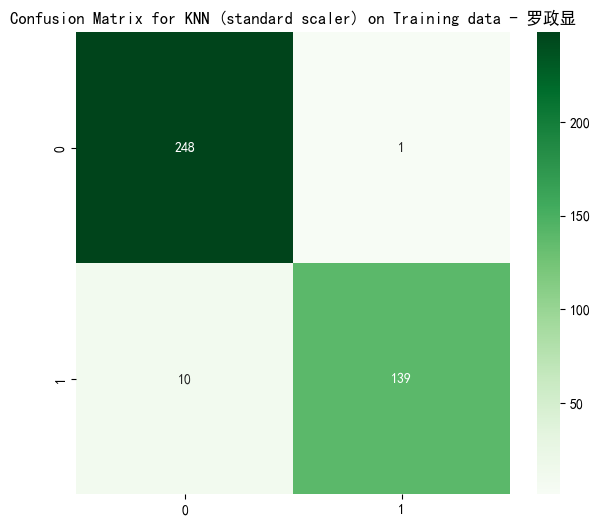

Test Accuracy score when k=9 (standard scaler) 0.9707602339181286
[[106   2]
 [  3  60]]


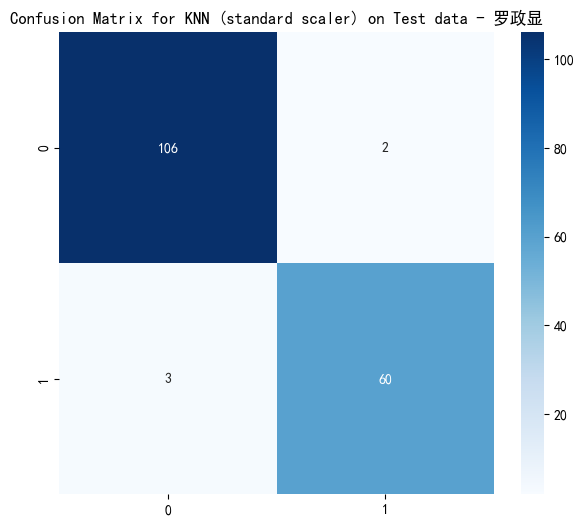

In [9]:
from sklearn.metrics import confusion_matrix
# 训练KNN模型
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
# 计算并输出训练集准确率
y_pred_train = knn.predict(X_train)
print("Training Accuracy score when k=9 (standard scaler)",metrics.accuracy_score(y_train,y_pred_train))
# 计算并输出训练集混淆矩阵
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
# 绘制训练集混淆矩阵热图
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for KNN (standard scaler) on Training data - 罗政显')
plt.show()
# 计算并输出测试集准确率
y_pred_test = knn.predict(X_test)
print("Test Accuracy score when k=9 (standard scaler)",metrics.accuracy_score(y_test,y_pred_test))
# 计算并输出测试集混淆矩阵
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
# 绘制测试集混淆矩阵热图
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN (standard scaler) on Test data - 罗政显')
plt.show()

## 6.2数据归一化

In [10]:
from sklearn.preprocessing import MinMaxScaler
# 创建Min-Max标准化器并对特征数据进行标准化处理
minmax = MinMaxScaler()
X_data_minmax = minmax.fit_transform(X_data)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_data_minmax, Y_data, test_size=0.3, random_state=42)

### 6.2.1KNN - 寻找K值

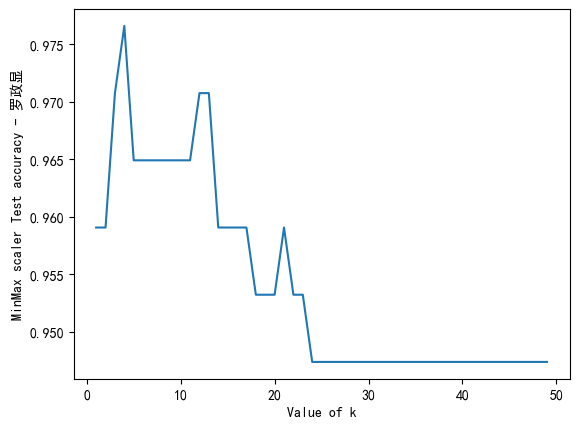

In [11]:
scores_list = [] # 用于存储每个k值对应的测试集准确率。
scores = {} # 用于存储每个k值及其对应的测试集准确率，方便后续查询。
k_range = range(1,50) # 定义k值的范围，从1到49。
# 遍历k值范围，训练和评估模型
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
# 绘制准确率随k值变化的图形
plt.plot(k_range, scores_list)
plt.xlabel("Value of k")
plt.ylabel("MinMax scaler Test accuracy - 罗政显")
plt.show()

### 6.2.2观察最优K值
可以观察到，当k=5时，准确率达到了约98%。现在，再次在测试数据上执行knn算法，以绘制混淆矩阵。

### 6.2.3预测（测试和训练）
使用上述确定的k值对测试和训练数据进行预测。绘制混淆矩阵进行分析。

Training Accuracy score when k=5 (MinMax scaler) 0.9773869346733668
[[247   2]
 [  7 142]]


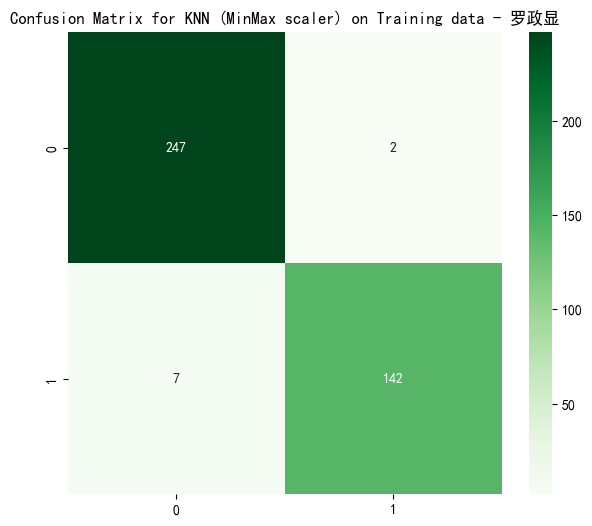

Test Accuracy score when k=5 (MinMax Scaler) 0.9649122807017544
[[105   3]
 [  3  60]]


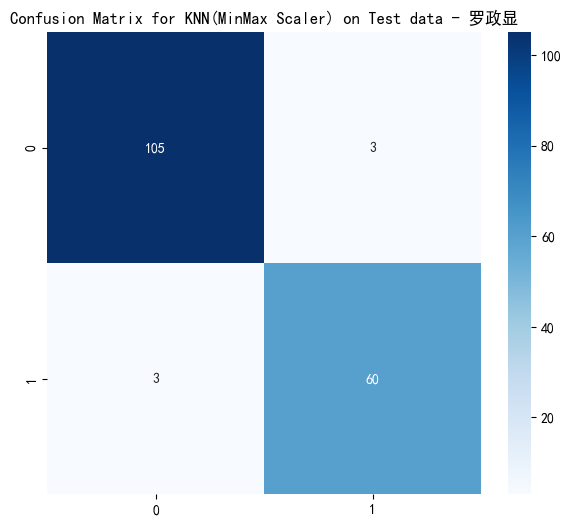

In [12]:
# 训练KNN模型
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
# 计算并输出训练集准确率
y_pred_train = knn.predict(X_train)
print("Training Accuracy score when k=5 (MinMax scaler)",metrics.accuracy_score(y_train,y_pred_train))
# 计算并输出训练集混淆矩阵
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
# 绘制训练集混淆矩阵热图
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for KNN (MinMax scaler) on Training data - 罗政显')
plt.show()
# 计算并输出测试集准确率
y_pred_test = knn.predict(X_test)
print("Test Accuracy score when k=5 (MinMax Scaler)",metrics.accuracy_score(y_test,y_pred_test))
# 计算并输出测试集混淆矩阵
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
# 绘制测试集混淆矩阵热图
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN(MinMax Scaler) on Test data - 罗政显')
plt.show()